# Современные методы анализа данных и машинного обучения, БИ

## НИУ ВШЭ, 2024-25 учебный год

# Семинар 5. EDA


В качестве эпиграфа к нашему сегодняшнему семинару, представляем вашему вниманию любопытный список из некоторых этапов:
- Извлечение данных
- Подготовка данных — очистка данных
- Подготовка данных — преобразование данных
- Исследование и визуализация данных
- Инжиниринг признаков

Вот оказывается, все эти пункты для DS'ника — это зачастую на первый взгляд скрытые, но одновременно с этим решительно необходимые этапы, по факту и позволяющие осуществить всю ту магию, которой так славится машинное обучение! В принципе, всё самое важное часто остаётся в тени, и EDA в этом плане — не исключение. Но это, конечно, абсолютно нормально! :)


Сегодня мы с вами попробуем лишь слегка прикоснуться к EDA и бегло посмотреть на основные этапы, которые реализуются в рамках этого процесса, а также повторить различные инструменты визуализаций и работы с данными, которые мы разбирали на предыдущих занятиях.

И да — то, что весь этот огромный ноутбук с миллионом разделов — это "лишь слегка прикоснуться", — это вы не ослышались... Думаю, вы действительно сможете почувствовать на практике, насколько EDA объёмен, важен, да и вообще масштаб всей нашей работы, — после того, как мы закончим!

Ну что же — кажется, пора приступать! :))

## Постановка задачи

Постановка задачи и оценка имеющихся данных — первый и важнейший шаг на пути к решению. Cделать это нужно ещё до того, как будет написана первая строчка кода.

Для нашего сегодняшнего семинара и, как следствие, для нашей задачи, данные — это открытые сведения об [энергопотреблении зданий в Нью-Йорке](https://www1.nyc.gov/html/gbee/html/plan/ll84_scores.shtml).

Наша цель — предсказать рейтинг энергопотребления здания (Energy Star Score) и понять, какие признаки оказывают на него наибольшее влияние.

Поехали!

## Чистка данных
Вопреки тому, какое впечатление может сложиться после посещения различных курсов и чтения статей по машинному обучению, данные не всегда представляют собой идеально организованный набор наблюдений без каких-либо пропусков или аномалий (например, можно взглянуть на известные наборы данных mtcars и  iris). Обычно данные содержат в себе кучу мусора, который необходимо почистить, да и вообще сами данные порой лучше воспринимать критически, для того чтобы затем привести их в приемлемый формат.

Чистка данных — необходимый и важнейший этап решения почти любой реальной задачи.

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from IPython.core.pylabtools import figsize

In [ ]:
# Это не обязательно, но позволяет красиво отображать информацию в блокноте

%matplotlib inline

#plt.rcParams['font.size'] = 24

pd.options.mode.chained_assignment = None
pd.set_option('display.max_columns', 60)

#sns.set(font_scale = 2)

### Cчитывание данных

Считаем данные и посмотрим на первые строки

In [ ]:
data = pd.read_csv('https://raw.githubusercontent.com/ddvika/DS_2021/main/lecture_2/Energy_consumption_NY.csv')
data.head()

,Order,Property Id,Property Name,Parent Property Id,Parent Property Name,BBL - 10 digits,"NYC Borough, Block and Lot (BBL) self-reported",NYC Building Identification Number (BIN),Address 1 (self-reported),Address 2,Postal Code,Street Number,Street Name,Borough,DOF Gross Floor Area,Primary Property Type - Self Selected,List of All Property Use Types at Property,Largest Property Use Type,Largest Property Use Type - Gross Floor Area (ft²),2nd Largest Property Use Type,2nd Largest Property Use - Gross Floor Area (ft²),3rd Largest Property Use Type,3rd Largest Property Use Type - Gross Floor Area (ft²),Year Built,Number of Buildings - Self-reported,Occupancy,Metered Areas (Energy),Metered Areas (Water),ENERGY STAR Score,Site EUI (kBtu/ft²),Weather Normalized Site EUI (kBtu/ft²),Weather Normalized Site Electricity Intensity (kWh/ft²),Weather Normalized Site Natural Gas Intensity (therms/ft²),Weather Normalized Source EUI (kBtu/ft²),Fuel Oil #1 Use (kBtu),Fuel Oil #2 Use (kBtu),Fuel Oil #4 Use (kBtu),Fuel Oil #5 & 6 Use (kBtu),Diesel #2 Use (kBtu),District Steam Use (kBtu),Natural Gas Use (kBtu),Weather Normalized Site Natural Gas Use (therms),Electricity Use - Grid Purchase (kBtu),Weather Normalized Site Electricity (kWh),Total GHG Emissions (Metric Tons CO2e),Direct GHG Emissions (Metric Tons CO2e),Indirect GHG Emissions (Metric Tons CO2e),Property GFA - Self-Reported (ft²),Water Use (All Water Sources) (kgal),Water Intensity (All Water Sources) (gal/ft²),Source EUI (kBtu/ft²),Release Date,Water Required?,DOF Benchmarking Submission Status,Latitude,Longitude,Community Board,Council District,Census Tract,NTA
0,1,13286,201/205,13286,201/205,1013160001,1013160001,1037549,201/205 East 42nd st.,Not Available,10017,675,3 AVENUE,Manhattan,289356.0,Office,Office,Office,293447,Not Available,Not Available,Not Available,Not Available,1963,2,100,Whole Building,Not Available,Not Available,305.6,303.1,37.8,Not Available,614.2,Not Available,Not Available,Not Available,Not Available,Not Available,5.15506751E7,Not Available,Not Available,38139374.2,1.10827705E7,6962.2,0,6962.2,762051,Not Available,Not Available,619.4,05/01/2017 05:32:03 PM,No,In Compliance,40.750791,-73.973963,6.0,4.0,88.0,Turtle Bay-East Midtown ...
1,2,28400,NYP Columbia (West Campus),28400,NYP Columbia (West Campus),1021380040,1-02138-0040,1084198; 1084387;1084385; 1084386; 1084388; 10...,622 168th Street,Not Available,10032,180,FT WASHINGTON AVENUE,Manhattan,3693539.0,Hospital (General Medical & Surgical),Hospital (General Medical & Surgical),Hospital (General Medical & Surgical),3889181,Not Available,Not Available,Not Available,Not Available,1969,12,100,Whole Building,Whole Building,55,229.8,228.8,24.8,2.4,401.1,Not Available,1.96248472E7,Not Available,Not Available,Not Available,-3.914148026E8,933073441,9330734.4,332365924,9.62613121E7,55870.4,51016.4,4854.1,3889181,Not Available,Not Available,404.3,04/27/2017 11:23:27 AM,No,In Compliance,40.841402,-73.942568,12.0,10.0,251.0,Washington Heights South ...
2,3,4778226,MSCHoNY North,28400,NYP Columbia (West Campus),1021380030,1-02138-0030,1063380,3975 Broadway,Not Available,10032,3975,BROADWAY,Manhattan,152765.0,Hospital (General Medical & Surgical),Hospital (General Medical & Surgical),Hospital (General Medical & Surgical),231342,Not Available,Not Available,Not Available,Not Available,1924,1,100,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,0,0,0,231342,Not Available,Not Available,Not Available,04/27/2017 11:23:27 AM,No,In Compliance,40.840427,-73.940249,12.0,10.0,251.0,Washington Heights South ...
3,4,4778267,Herbert Irving Pavilion & Millstein Hospital,28400,NYP Columbia (West Campus),1021390001,1-02139-0001,1087281; 1076746,161 Fort Washington Ave,177 Fort Washington Ave,10032,161,FT WASHINGTON AVENUE,Manhattan,891040.0,Hos

In [ ]:
print("Размеры датасета: ", data.shape)
print("Колонки датасета: ", data.columns)

Размеры датасета:  (11746, 60)
Колонки датасета:  Index(['Order', 'Property Id', 'Property Name', 'Parent Property Id',
       'Parent Property Name', 'BBL - 10 digits',
       'NYC Borough, Block and Lot (BBL) self-reported',
       'NYC Building Identification Number (BIN)', 'Address 1 (self-reported)',
       'Address 2', 'Postal Code', 'Street Number', 'Street Name', 'Borough',
       'DOF Gross Floor Area', 'Primary Property Type - Self Selected',
       'List of All Property Use Types at Property',
       'Largest Property Use Type',
       'Largest Property Use Type - Gross Floor Area (ft²)',
       '2nd Largest Property Use Type',
       '2nd Largest Property Use - Gross Floor Area (ft²)',
       '3rd Largest Property Use Type',
       '3rd Largest Property Use Type - Gross Floor Area (ft²)', 'Year Built',
       'Number of Buildings - Self-reported', 'Occupancy',
       'Metered Areas (Energy)', 'Metered Areas  (Water)', 'ENERGY STAR Score',
       'Site EUI (kBtu/ft²)', 'Weat

Воспользуемся методом info для того, чтобы получить представление о стобцах датафрейма


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11746 entries, 0 to 11745
Data columns (total 60 columns):
 #   Column                                                      Non-Null Count  Dtype  
---  ------                                                      --------------  -----  
 0   Order                                                       11746 non-null  int64  
 1   Property Id                                                 11746 non-null  int64  
 2   Property Name                                               11746 non-null  object 
 3   Parent Property Id                                          11746 non-null  object 
 4   Parent Property Name                                        11746 non-null  object 
 5   BBL - 10 digits                                             11735 non-null  object 
 6   NYC Borough, Block and Lot (BBL) self-reported              11746 non-null  object 
 7   NYC Building Identification Number (BIN)                    11746 non-null  object 
 

После непродолжительного обзора данных, в глаза сразу бросается пара проблем. Какие?


1. Мы уже знаем, что хотим предсказать ENERGY STAR Score, но хорошо бы понять, что из себя представляют остальные признаки. Это не всегда проблема, иногда удается решить задачу машинного обучения, не имея почти никакого представления о том, что признаки из себя представляют. Однако в нашем случае, для нас важна интерпретируемость, поэтому важно понимать, что несут в себе основные характеристики данных.
2. Не все признаки для нас одинаково важны, однако с нашим целевым признаком уж точно нужно разобраться! Вот какое описание для целевой переменной нам представлено на сайте-источнике: «Оценка в баллах от 1 до 100, основанная на предоставленных сведениях о потреблении электроэнергии. Рейтинг энергопотребления это относительная величина, необходимая для сравнения эффективности использования энергии различными зданиями.»
3. Пропущенные данные, вставленные в набор, выглядят как строка с записью “Not Available”. Это означает, что Python, даже если эта колонка содержит в себе преимущественно числовые признаки, будет интерпретировать её как тип данных object, потому что Pandas интерпретирует любой признак, содержащий строковые значения, как строку.

### Корректировка типов

Еще раз воспользуемся методом `data.info()`

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11746 entries, 0 to 11745
Data columns (total 60 columns):
 #   Column                                                      Non-Null Count  Dtype  
---  ------                                                      --------------  -----  
 0   Order                                                       11746 non-null  int64  
 1   Property Id                                                 11746 non-null  int64  
 2   Property Name                                               11746 non-null  object 
 3   Parent Property Id                                          11746 non-null  object 
 4   Parent Property Name                                        11746 non-null  object 
 5   BBL - 10 digits                                             11735 non-null  object 
 6   NYC Borough, Block and Lot (BBL) self-reported              11746 non-null  object 
 7   NYC Building Identification Number (BIN)                    11746 non-null  object 
 

Очевидно, многие признаки, являющиеся изначально числовыми (например, площади), интерпретированы как object. Анализировать их крайне сложно, так что сначала конвертируем их в числа, а именно в тип float.



Заменим значение “Not Available” в данных на «не число» (np.nan — «not a number»), которое Python все же интерпретирует как число. Это позволит изменить тип соответствующих числовых признаков на float:

In [ ]:
# Для замены значений в датафрейме воспользуемся методом replace({from_val1: to_val1, ...})

data = data.replace({'Not Available': np.nan})

Теперь давайте найдем колонки, которые должны быть числовыми.

Как это сделать? Есть предложения?

In [ ]:
data.sample(3)

,Order,Property Id,Property Name,Parent Property Id,Parent Property Name,BBL - 10 digits,"NYC Borough, Block and Lot (BBL) self-reported",NYC Building Identification Number (BIN),Address 1 (self-reported),Address 2,Postal Code,Street Number,Street Name,Borough,DOF Gross Floor Area,Primary Property Type - Self Selected,List of All Property Use Types at Property,Largest Property Use Type,Largest Property Use Type - Gross Floor Area (ft²),2nd Largest Property Use Type,2nd Largest Property Use - Gross Floor Area (ft²),3rd Largest Property Use Type,3rd Largest Property Use Type - Gross Floor Area (ft²),Year Built,Number of Buildings - Self-reported,Occupancy,Metered Areas (Energy),Metered Areas (Water),ENERGY STAR Score,Site EUI (kBtu/ft²),Weather Normalized Site EUI (kBtu/ft²),Weather Normalized Site Electricity Intensity (kWh/ft²),Weather Normalized Site Natural Gas Intensity (therms/ft²),Weather Normalized Source EUI (kBtu/ft²),Fuel Oil #1 Use (kBtu),Fuel Oil #2 Use (kBtu),Fuel Oil #4 Use (kBtu),Fuel Oil #5 & 6 Use (kBtu),Diesel #2 Use (kBtu),District Steam Use (kBtu),Natural Gas Use (kBtu),Weather Normalized Site Natural Gas Use (therms),Electricity Use - Grid Purchase (kBtu),Weather Normalized Site Electricity (kWh),Total GHG Emissions (Metric Tons CO2e),Direct GHG Emissions (Metric Tons CO2e),Indirect GHG Emissions (Metric Tons CO2e),Property GFA - Self-Reported (ft²),Water Use (All Water Sources) (kgal),Water Intensity (All Water Sources) (gal/ft²),Source EUI (kBtu/ft²),Release Date,Water Required?,DOF Benchmarking Submission Status,Latitude,Longitude,Community Board,Council District,Census Tract,NTA
5986,7108,2805189,1460 Grand Concourse - 35383,Not Applicable: Standalone Property,Not Applicable: Standalone Property,2028320035,2-02832-0035,2007992,1460 Grand Concourse,NaN,10457,1460,GRAND CONCOURSE,Bronx,55776.0,Multifamily Housing,Multifamily Housing,Multifamily Housing,67860,NaN,NaN,NaN,NaN,1920,1,100,Whole Building,Whole Building,98,34.2,36.2,10.6,NaN,113.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2322249.3,719960.4,215.5,0,215.5,67860,1737.4,25.6,107.5,04/24/2017 11:37:33 AM,No,In Compliance,40.840354,-73.91289,4.0,14.0,225.0,East Concourse-Concourse Village ...
1907,2250,4405918,Madison Ave,Not Applicable: Standalone Property,Not Applicable: Standalone Property,1008580058,1-00858-0058,1016920,89-95 Madison Ave,NaN,10016,89,MADISON AVENUE,Manhattan,146161.0,Office,"Office, Retail Store",Office,156036,Retail Store,4000,NaN,NaN,1913,1,100,Whole Building,NaN,NaN,50.8,54.8,4,NaN,84.7,NaN,5865828,NaN,NaN,NaN,NaN,NaN,NaN,2256014.3,646839.5,644.7,435.3,209.4,160036,NaN,NaN,81.3,06/21/2017 10:01:51 AM,No,In Compliance,40.744367,-73.98542,5.0,2.0,74.0,Midtown-Midtown South ...
4267,4859,2815700,145 East 92 Street,Not Applicable: Standalone Property,Not Applicable: Standalone Property,1015210020,1-01521-0020,1048344,145 East 92 Street,NaN,10128,145,EAST 92 STREET,Manhattan,85924.0,Multifamily Housing,Multifamily Housing,Multifamily Housing,85924,NaN,NaN,NaN,NaN,1929,1,100,Whole Building,NaN,94,48.2,NaN,4.1,0.1,NaN,NaN,2346275.9,NaN,NaN,NaN,NaN,604600,6046,1190078.3,348792,316.7,206.2,110.4,85924,4153.2,48.34,78.5,04/27/2017 03:17:15 PM,Yes,In Compliance,40.783183,-73.95248,8.0,5.0,15801.0,Upper East Side-Carnegie Hill ...


Все гениальное просто: мы найдем, какие подстроки должны содержаться в названиях таких столбцов

In [ ]:
part_name_numeric_cols = ['ft²', 'kBtu', 'Metric Tons CO2e', 'kWh', 'therms', 'gal', 'Score']

Конвертируем выбранные числовые столбцы в тип float (например воспользовавшись генератором и функцией any)


In [ ]:
for col in list(data.columns):
    if any([n_col in col for n_col in part_name_numeric_cols]):
        print(col)
        data[col] = data[col].astype(float)

Largest Property Use Type - Gross Floor Area (ft²)
2nd Largest Property Use - Gross Floor Area (ft²)
3rd Largest Property Use Type - Gross Floor Area (ft²)
ENERGY STAR Score
Site EUI (kBtu/ft²)
Weather Normalized Site EUI (kBtu/ft²)
Weather Normalized Site Electricity Intensity (kWh/ft²)
Weather Normalized Site Natural Gas Intensity (therms/ft²)
Weather Normalized Source EUI (kBtu/ft²)
Fuel Oil #1 Use (kBtu)
Fuel Oil #2 Use (kBtu)
Fuel Oil #4 Use (kBtu)
Fuel Oil #5 & 6 Use (kBtu)
Diesel #2 Use (kBtu)
District Steam Use (kBtu)
Natural Gas Use (kBtu)
Weather Normalized Site Natural Gas Use (therms)
Electricity Use - Grid Purchase (kBtu)
Weather Normalized Site Electricity (kWh)
Total GHG Emissions (Metric Tons CO2e)
Direct GHG Emissions (Metric Tons CO2e)
Indirect GHG Emissions (Metric Tons CO2e)
Property GFA - Self-Reported (ft²)
Water Use (All Water Sources) (kgal)
Water Intensity (All Water Sources) (gal/ft²)
Source EUI (kBtu/ft²)


Проверим, что всё получилось:

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11746 entries, 0 to 11745
Data columns (total 60 columns):
 #   Column                                                      Non-Null Count  Dtype  
---  ------                                                      --------------  -----  
 0   Order                                                       11746 non-null  int64  
 1   Property Id                                                 11746 non-null  int64  
 2   Property Name                                               11746 non-null  object 
 3   Parent Property Id                                          11746 non-null  object 
 4   Parent Property Name                                        11746 non-null  object 
 5   BBL - 10 digits                                             11735 non-null  object 
 6   NYC Borough, Block and Lot (BBL) self-reported              11735 non-null  object 
 7   NYC Building Identification Number (BIN)                    11584 non-null  object 
 

Гениально, это сработало! Мы молодцы! :)

Посчитаем, сколько после всех манипуляций у нас стало пропущенных значений:


In [ ]:
data.isna().sum()

,0
Order,0
Property Id,0
Property Name,0
Parent Property Id,0
Parent Property Name,0
BBL - 10 digits,11
"NYC Borough, Block and Lot (BBL) self-reported",11
NYC Building Identification Number (BIN),162
Address 1 (self-reported),0
Address 2,11539


Выглядит, честно говоря, не очень приятно...


Посмотрим на статистики по колонкам датасета при помощи метода `data.describe()`

In [ ]:
data.describe()

,Order,Property Id,DOF Gross Floor Area,Largest Property Use Type - Gross Floor Area (ft²),2nd Largest Property Use - Gross Floor Area (ft²),3rd Largest Property Use Type - Gross Floor Area (ft²),Year Built,Number of Buildings - Self-reported,Occupancy,ENERGY STAR Score,Site EUI (kBtu/ft²),Weather Normalized Site EUI (kBtu/ft²),Weather Normalized Site Electricity Intensity (kWh/ft²),Weather Normalized Site Natural Gas Intensity (therms/ft²),Weather Normalized Source EUI (kBtu/ft²),Fuel Oil #1 Use (kBtu),Fuel Oil #2 Use (kBtu),Fuel Oil #4 Use (kBtu),Fuel Oil #5 & 6 Use (kBtu),Diesel #2 Use (kBtu),District Steam Use (kBtu),Natural Gas Use (kBtu),Weather Normalized Site Natural Gas Use (therms),Electricity Use - Grid Purchase (kBtu),Weather Normalized Site Electricity (kWh),Total GHG Emissions (Metric Tons CO2e),Direct GHG Emissions (Metric Tons CO2e),Indirect GHG Emissions (Metric Tons CO2e),Property GFA - Self-Reported (ft²),Water Use (All Water Sources) (kgal),Water Intensity (All Water Sources) (gal/ft²),Source EUI (kBtu/ft²),Latitude,Longitude,Community Board,Council District,Census Tract
count,11746.000000,1.174600e+04,1.162800e+04,1.174400e+04,3741.000000,1484.000000,11746.000000,11746.000000,11746.000000,9642.000000,11583.000000,10281.000000,10959.000000,9783.000000,10281.000000,9.000000e+00,2.581000e+03,1.321000e+03,5.940000e+02,1.600000e+01,9.360000e+02,1.030400e+04,9.784000e+03,1.150200e+04,1.096000e+04,1.167200e+04,1.166300e+04,1.168100e+04,1.174600e+04,7.762000e+03,7762.000000,11583.000000,9483.000000,9483.000000,9483.000000,9483.000000,9483.000000
mean,7185.759578,3.642958e+06,1.732695e+05,1.605524e+05,22778.682010,12016.825270,1948.738379,1.289971,98.762557,59.854594,280.071484,309.747466,11.072643,1.901441,417.915709,3.395398e+06,3.186882e+06,5.294367e+06,2.429105e+06,1.193594e+06,2.868907e+08,5.048545e+07,5.364578e+05,5.965472e+06,1.768752e+06,4.553657e+03,2.477937e+03,2.076339e+03,1.673739e+05,1.591798e+04,136.172432,385.908029,40.754379,-73.957057,7.140673,15.771275,4977.596647
std,4323.859984,1.049070e+06,3.367055e+05,3.095746e+05,55094.441422,27959.755486,30.576386,4.017484,7.501603,29.993586,8607.178877,9784.731207,127.733868,97.204587,10530.524339,2.213237e+06,5.497154e+06,5.881863e+06,4.442946e+06,3.558178e+06,3.124603e+09,3.914719e+09,4.022606e+07,3.154430e+07,9.389154e+06,2.041639e+05,1.954498e+05,5.931295e+04,3.189238e+05,1.529524e+05,1730.726938,9312.736225,0.080120,0.046337,3.954129,15.674375,13520.422990
min,1.000000,7.365000e+03,5.002800e+04,5.400000e+01,0.000000,0.000000,1600.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.085973e+05,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-4.690797e+08,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-2.313430e+04,0.000000e+00,0.000000e+00,0.000000,0.000000,40.516065,-74.243582,1.000000,1.000000,1.000000
25%,3428.250000,2.747222e+06,6.524000e+04,6.520100e+04,4000.000000,1720.750000,1927.000000,1.000000,100.000000,37.000000,61.800000,65.100000,3.800000,0.100000,103.500000,1.663594e+06,2.550378e+05,2.128213e+06,0.000000e+00,5.698020e+04,4.320254e+06,1.098251e+06,1.176952e+04,1.043673e+06,3.019975e+05,3.287000e+02,1.474500e+02,9.480000e+01,6.699400e+04,2.595400e+03,27.150000,99.400000,40.707226,-73.984662,4.000000,4.000000,100.000000
50%,6986.500000,3.236404e+06,9.313850e+04,9.132400e+04,8654.000000,5000.000000,1941.000000,1.000000,100.000000,65.000000,78.500000,82.500000,5.300000,0.500000,129.400000,4.328815e+06,1.380138e+06,4.312984e+06,0.000000e+00,2.070020e+05,9.931240e+06,4.103962e+06,4.445525e+04,1.855196e+06,5.416312e+05,5.002500e+02,2.726000e+02,1.718000e+02,9.408000e+04,4.692500e+03,45.095000,124.900000,40.759130,-73.962810,7.000000,9.000000,201.000000
75%,11054.500000,4.409092e+06,1.596140e+05,1.532550e+05,20000.000000,12000.000000,1966.000000,1.000000,100.000000,85.000000,97.600000,102.500000,9.200000,0.700000,167.200000,4.938947e+06,4.445808e+06,6.514520e+06,4.293825e+06,2.918332e+0

#### Вопрос
Почему при использовании `data.describe()` вывелась статистика не по всем столбцам (всего их 60)?

In [ ]:
data.describe().shape

(8, 37)

In [ ]:
data.shape

(11746, 60)

## Работа с пропусками
В дополнение к некорректному определению типов данных, другая частая проблема при первичной работе с данными — это пропуски. У наличия пропусков могут быть разные причины, но независимо от этих причин пропуски в любом случае необходимо либо заполнить, либо исключить из набора полностью. Без этого этапа алгоритмы будут работать неправильно.

### Детектирование пропусков

Для начала давайте попробуем оценить масштаб проблемы для наших данных

In [ ]:
# Воспользуемся следующей функцией, которая предоставляет отчет о пропусках в данных

def missing_values_table(df):
    """
    Функция возвращает резюме по пропущенным значениям
    """
    # Общее число пропусков
    mis_val = df.isnull().sum()

    # Процент пропусков
    mis_val_percent = 100 * df.isnull().sum() / len(df)

    # Создадит таблицу с результатом
    mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)

    # Переименнуем колонки
    mis_val_table_ren_columns = mis_val_table.rename(
    columns = {0 : 'Missing Values', 1 : '% of Total Values'})

    # Отсортируем по проценту пропущенных значений
    mis_val_table_ren_columns = mis_val_table_ren_columns[
        mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
    '% of Total Values', ascending=False).round(1)

    # Выведем некоторую информацию
    print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"
        "There are " + str(mis_val_table_ren_columns.shape[0]) +
            " columns that have missing values.")

    return mis_val_table_ren_columns

In [ ]:
# Воспользуемся описанной выше функцией на нашем датасете

missing_values_table(data)

Your selected dataframe has 60 columns.
There are 46 columns that have missing values.


,Missing Values,% of Total Values
Fuel Oil #1 Use (kBtu),11737,99.9
Diesel #2 Use (kBtu),11730,99.9
Address 2,11539,98.2
Fuel Oil #5 & 6 Use (kBtu),11152,94.9
District Steam Use (kBtu),10810,92.0
Fuel Oil #4 Use (kBtu),10425,88.8
3rd Largest Property Use Type - Gross Floor Area (ft²),10262,87.4
3rd Largest Property Use Type,10262,87.4
Fuel Oil #2 Use (kBtu),9165,78.0
2nd Largest Property Use Type,8005,68.2


При удалении данных следует быть осторожным. Тем не менее, признак нам вряд ли вообще пригодится, если пропусков в нем слишком много. В данном случае удаляем признаки, в которых пропусков больше 50%.

In [ ]:
# Получим отчет из функции missing_values_table
missing_df = missing_values_table(data)

# Выберем те колонки, для которых '% of Total Values' больше 50
missing_columns = list(missing_df[missing_df['% of Total Values'] > 50].index)

print('We will remove %d columns.' % len(missing_columns))

Your selected dataframe has 60 columns.
There are 46 columns that have missing values.
We will remove 11 columns.


In [ ]:
# Удалим столбцы с большим числом пропусков

data = data.drop(columns = list(missing_columns))

In [ ]:
# Проверим, что датасет (в частности его размер) изменился ожидаемым образом

data.shape

(11746, 49)

In [ ]:
# Посмотрим еще раз на пропуски при помощи функции missing_values_table

missing_values_table(data)

Your selected dataframe has 49 columns.
There are 35 columns that have missing values.


,Missing Values,% of Total Values
Metered Areas (Water),4609,39.2
Water Intensity (All Water Sources) (gal/ft²),3984,33.9
Water Use (All Water Sources) (kgal),3984,33.9
NTA,2263,19.3
Census Tract,2263,19.3
Council District,2263,19.3
Community Board,2263,19.3
Longitude,2263,19.3
Latitude,2263,19.3
ENERGY STAR Score,2104,17.9


Оставшиеся пропуски необходимо заполнить, опираясь на одну из стратегий по заполнению пропусков, которые мы обсуждали на лекции.

### Заполнение пропусков

Основная функция, которая используется для заполнения пропусков — это функция `.fillna()`

Она может принимать как одно значение (например -1):

In [ ]:
data.fillna(-1)

,Order,Property Id,Property Name,Parent Property Id,Parent Property Name,BBL - 10 digits,"NYC Borough, Block and Lot (BBL) self-reported",NYC Building Identification Number (BIN),Address 1 (self-reported),Postal Code,Street Number,Street Name,Borough,DOF Gross Floor Area,Primary Property Type - Self Selected,List of All Property Use Types at Property,Largest Property Use Type,Largest Property Use Type - Gross Floor Area (ft²),Year Built,Number of Buildings - Self-reported,Occupancy,Metered Areas (Energy),Metered Areas (Water),ENERGY STAR Score,Site EUI (kBtu/ft²),Weather Normalized Site EUI (kBtu/ft²),Weather Normalized Site Electricity Intensity (kWh/ft²),Weather Normalized Site Natural Gas Intensity (therms/ft²),Weather Normalized Source EUI (kBtu/ft²),Natural Gas Use (kBtu),Weather Normalized Site Natural Gas Use (therms),Electricity Use - Grid Purchase (kBtu),Weather Normalized Site Electricity (kWh),Total GHG Emissions (Metric Tons CO2e),Direct GHG Emissions (Metric Tons CO2e),Indirect GHG Emissions (Metric Tons CO2e),Property GFA - Self-Reported (ft²),Water Use (All Water Sources) (kgal),Water Intensity (All Water Sources) (gal/ft²),Source EUI (kBtu/ft²),Release Date,Water Required?,DOF Benchmarking Submission Status,Latitude,Longitude,Community Board,Council District,Census Tract,NTA
0,1,13286,201/205,13286,201/205,1013160001,1013160001,1037549,201/205 East 42nd st.,10017,675,3 AVENUE,Manhattan,289356.0,Office,Office,Office,293447.0,1963,2,100,Whole Building,-1,-1.0,305.6,303.1,37.8,-1.0,614.2,-1.0,-1.0,38139374.2,11082770.5,6962.2,0.0,6962.2,762051.0,-1.0,-1.00,619.4,05/01/2017 05:32:03 PM,No,In Compliance,40.750791,-73.973963,6.0,4.0,88.0,Turtle Bay-East Midtown ...
1,2,28400,NYP Columbia (West Campus),28400,NYP Columbia (West Campus),1021380040,1-02138-0040,1084198; 1084387;1084385; 1084386; 1084388; 10...,622 168th Street,10032,180,FT WASHINGTON AVENUE,Manhattan,3693539.0,Hospital (General Medical & Surgical),Hospital (General Medical & Surgical),Hospital (General Medical & Surgical),3889181.0,1969,12,100,Whole Building,Whole Building,55.0,229.8,228.8,24.8,2.4,401.1,933073441.0,9330734.4,332365924.0,96261312.1,55870.4,51016.4,4854.1,3889181.0,-1.0,-1.00,404.3,04/27/2017 11:23:27 AM,No,In Compliance,40.841402,-73.942568,12.0,10.0,251.0,Washington Heights South ...
2,3,4778226,MSCHoNY North,28400,NYP Columbia (West Campus),1021380030,1-02138-0030,1063380,3975 Broadway,10032,3975,BROADWAY,Manhattan,152765.0,Hospital (General Medical & Surgical),Hospital (General Medical & Surgical),Hospital (General Medical & Surgical),231342.0,1924,1,100,-1,-1,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,0.0,0.0,0.0,231342.0,-1.0,-1.00,-1.0,04/27/2017 11:23:27 AM,No,In Compliance,40.840427,-73.940249,12.0,10.0,251.0,Washington Heights South ...
3,4,4778267,Herbert Irving Pavilion & Millstein Hospital,28400,NYP Columbia (West Campus),1021390001,1-02139-0001,1087281; 1076746,161 Fort Washington Ave,10032,161,FT WASHINGTON AVENUE,Manhattan,891040.0,Hospital (General Medical & Surgical),Hospital (General Medical & Surgical),Hospital (General Medical & Surgical),1305748.0,1971,1,100,-1,-1,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,0.0,0.0,0.0,1305748.0,-1.0,-1.00,-1.0,04/27/2017 11:23:27 AM,No,In Compliance,40.840746,-73.942854,12.0,10.0,255.0,Washington Heights South ...
4,5,4778288,Neuro Institute,28400,NYP Columbia (West Campus),1021390085,1-02139-0085,1063403,710 West 168th Street,10032,193,FT WASHINGTON AVENUE,Manhattan,211400.0,Hospital (General Medical & Surgical),Hospital (General Medical & Surgical),Hospital (General Medical & Surgical),179694.0,1932,1,100,-1,-1,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,0.0,0.0,0.0,179694.0,-1.0,-1.00,-1.0,04/27/2017 11:23:27 AM,No,In Compliance,40.841559,-73.942528,12.0,10.0,255.0,Washington Heights South ...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,..

Так и pd.Series, у которого индексы являются названиями столбцов, а значения — это те значения, на которые мы хотим заменить пропуски.

Например, можно заменить пропуски максимальным значением в столбце, применив .max()

In [ ]:
data.fillna(data.max())

#### Вопрос

Почему возникла ошибка? И как её исправить?

In [ ]:
data.fillna(data.max(numeric_only = True))

,Order,Property Id,Property Name,Parent Property Id,Parent Property Name,BBL - 10 digits,"NYC Borough, Block and Lot (BBL) self-reported",NYC Building Identification Number (BIN),Address 1 (self-reported),Postal Code,Street Number,Street Name,Borough,DOF Gross Floor Area,Primary Property Type - Self Selected,List of All Property Use Types at Property,Largest Property Use Type,Largest Property Use Type - Gross Floor Area (ft²),Year Built,Number of Buildings - Self-reported,Occupancy,Metered Areas (Energy),Metered Areas (Water),ENERGY STAR Score,Site EUI (kBtu/ft²),Weather Normalized Site EUI (kBtu/ft²),Weather Normalized Site Electricity Intensity (kWh/ft²),Weather Normalized Site Natural Gas Intensity (therms/ft²),Weather Normalized Source EUI (kBtu/ft²),Natural Gas Use (kBtu),Weather Normalized Site Natural Gas Use (therms),Electricity Use - Grid Purchase (kBtu),Weather Normalized Site Electricity (kWh),Total GHG Emissions (Metric Tons CO2e),Direct GHG Emissions (Metric Tons CO2e),Indirect GHG Emissions (Metric Tons CO2e),Property GFA - Self-Reported (ft²),Water Use (All Water Sources) (kgal),Water Intensity (All Water Sources) (gal/ft²),Source EUI (kBtu/ft²),Release Date,Water Required?,DOF Benchmarking Submission Status,Latitude,Longitude,Community Board,Council District,Census Tract,NTA
0,1,13286,201/205,13286,201/205,1013160001,1013160001,1037549,201/205 East 42nd st.,10017,675,3 AVENUE,Manhattan,289356.0,Office,Office,Office,293447.0,1963,2,100,Whole Building,NaN,100.0,305.6,303.1,37.8,9393.0,614.2,3.942852e+11,3.942852e+09,3.813937e+07,11082770.5,6962.2,0.0,6962.2,762051.0,6594603.9,96305.69,619.4,05/01/2017 05:32:03 PM,No,In Compliance,40.750791,-73.973963,6.0,4.0,88.0,Turtle Bay-East Midtown ...
1,2,28400,NYP Columbia (West Campus),28400,NYP Columbia (West Campus),1021380040,1-02138-0040,1084198; 1084387;1084385; 1084386; 1084388; 10...,622 168th Street,10032,180,FT WASHINGTON AVENUE,Manhattan,3693539.0,Hospital (General Medical & Surgical),Hospital (General Medical & Surgical),Hospital (General Medical & Surgical),3889181.0,1969,12,100,Whole Building,Whole Building,55.0,229.8,228.8,24.8,2.4,401.1,9.330734e+08,9.330734e+06,3.323659e+08,96261312.1,55870.4,51016.4,4854.1,3889181.0,6594603.9,96305.69,404.3,04/27/2017 11:23:27 AM,No,In Compliance,40.841402,-73.942568,12.0,10.0,251.0,Washington Heights South ...
2,3,4778226,MSCHoNY North,28400,NYP Columbia (West Campus),1021380030,1-02138-0030,1063380,3975 Broadway,10032,3975,BROADWAY,Manhattan,152765.0,Hospital (General Medical & Surgical),Hospital (General Medical & Surgical),Hospital (General Medical & Surgical),231342.0,1924,1,100,NaN,NaN,100.0,869265.0,939329.0,6259.4,9393.0,986366.0,3.942852e+11,3.942852e+09,1.691763e+09,495827334.5,0.0,0.0,0.0,231342.0,6594603.9,96305.69,912801.1,04/27/2017 11:23:27 AM,No,In Compliance,40.840427,-73.940249,12.0,10.0,251.0,Washington Heights South ...
3,4,4778267,Herbert Irving Pavilion & Millstein Hospital,28400,NYP Columbia (West Campus),1021390001,1-02139-0001,1087281; 1076746,161 Fort Washington Ave,10032,161,FT WASHINGTON AVENUE,Manhattan,891040.0,Hospital (General Medical & Surgical),Hospital (General Medical & Surgical),Hospital (General Medical & Surgical),1305748.0,1971,1,100,NaN,NaN,100.0,869265.0,939329.0,6259.4,9393.0,986366.0,3.942852e+11,3.942852e+09,1.691763e+09,495827334.5,0.0,0.0,0.0,1305748.0,6594603.9,96305.69,912801.1,04/27/2017 11:23:27 AM,No,In Compliance,40.840746,-73.942854,12.0,10.0,255.0,Washington Heights South ...
4,5,4778288,Neuro Institute,28400,NYP Columbia (West Campus),1021390085,1-02139-0085,1063403,710 West 168th Street,10032,193,FT WASHINGTON AVENUE,Manhattan,211400.0,Hospital (General Medical & Surgical),Hospital (General Medical & Surgical),Hospital (General Medical & Surgical),179694.0,1932,1,100,NaN,NaN,100.0,869265.0,939329.0,6259.4,9393.0,986366.0,3.942852e+11,3.942852e+09,1.691763e+09,495827334.5,0.0,0.0,0.0,179694.0,6594603.9,96305.69,912801.1,04/27/2017 11:23:27 AM,No,In Compliance,40.8415

В нашем же случае давайте заменим пропуски в числовых признаках средним по колонке (`.mean()`, как и предыдущая функция, выдаст средние только для числовых столбцов)

In [ ]:
data = data.fillna(data.mean(numeric_only = True))

В категориальных же признаках давайте будем использовать просто -1 в качестве символа пропуска.

In [ ]:
# Поскольку этот код выполняется после предыдущей ячейки, то нам достаточно сделать fillna(-1), потому что пропуски в числовых признаках уже заполнены

data = data.fillna(-1)

Ну вот, всё получилось! Проверим, что пропусков действительно не осталось:

In [ ]:
data.isna().any().any()

False

Разумеется, вы можете — да и это рекомендуется — в своих задачах придумать что-то более сложное, продвинутое и оригинальное, чем то, что мы рассмотрели выше. Сейчас же, напомним, наша с вами цель — лишь легонько коснуться EDA и изучить, какие в целом присутствуют этапы в первичном анализе данных и что в рамках этих этапов можно вообще делать!

## Univariate analysis

Теперь, когда утомительные,  но совершенно необходимые  этапы чистки данных и работы с пропусками закончены — можно углубляться в анализ.

Сделаем здесь небольшой шаг назад и кратко поговорим о EDA в целом.

Разведочный анализ данных (Exploratory Data Analysis, EDA) — это процесс, который можно продолжать до бесконечности: мы строим графики, ищем закономерности, детектируем аномалии, анализируем связи между признаками, а также в целом "погружаемся в данные".

Глобально, цель этого этапа в рамках анализа данных заключается в том, чтобы понять, что имеющиеся данные могут дать нам полезного в принципе. Обычно процесс начинается с обзора всего набора, затем переходит к его специфическим подмножествам и так далее. Любые находки могут быть по-своему интересны, также они могут дать нам ценные подсказки, например, по поводу относительной значимости различных признаков к целевой переменной или любые другие полезные инсайты.

###  Анализ целевой переменной
Напомню, что глобальная цель — это предсказание значения целевого признака, рейтинга энергопотребления в нашем случае (кстати, давайте поэтому переименуем его в score в нашем наборе). Так что в рамках [Univariate analysis](https://en.wikipedia.org/wiki/Univariate_(statistics) целесообразно для начала понять, какое целевая переменная имеет распределение.

Посмотрим на него, построив гистограмму с matplotlib.

Text(0.5, 1.0, 'Energy Star Score Distribution')

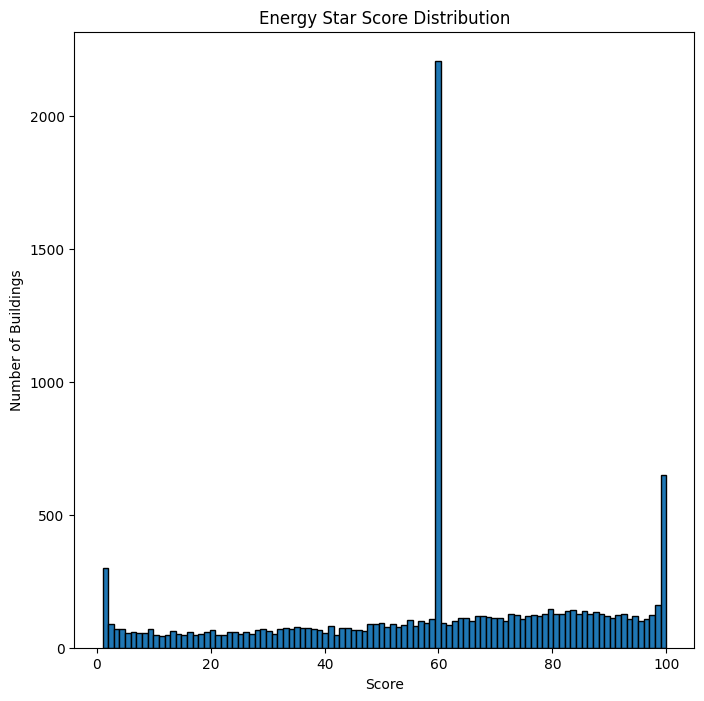

In [ ]:
figsize(8, 8)

# Для удобства переименнуем столбец 'ENERGY STAR Score' в 'score' при помощи метода rename
data = data.rename(columns = {'ENERGY STAR Score': 'score'})

# Построим гистограмму распределения столбца score, воспользовавшись функцией plt.hist, указав число бинов (например) 100
plt.hist(data['score'], bins = 100, edgecolor = 'k')

plt.xlabel('Score')
plt.ylabel('Number of Buildings')
plt.title('Energy Star Score Distribution')
#plt.style.use('fivethirtyeight')

#### Вопрос

Почему распределение именно такое? Что вы можете сказать? Какие выводы напрашиваются?

#### Вывод

**Пока выглядит довольно подозрительно!**

Интересующий нас рейтинг представляет собой перцентиль, так что ожидаемо было бы увидеть равномерное распределение, где каждому значению соответствует примерно одинаковое количество зданий. Хотя в нашем случае на лицо диспропорция, больше всего зданий имеют максимальное значение рейтинга — 100, либо минимальное — 1 (высокий рейтинг это хороший показатель).

Обратимся к описанию признака и вспомним, что он основывается на “предоставляемых отчетах об энергопотреблении”. Это, возможно, кое-что объясняет. Просить владельцев зданий отчитаться об эффективности использования электроэнергии — это почти то же самое, что просить поставить студента оценку самому себе на экзамене. В результате мы получаем не самую объективную оценку эффективности использования электроэнергии в зданиях.

Если бы время не было ничем ограничено, стоило бы выяснить, почему большинство зданий имеют слишком высокие или слишком низкие значения рейтинга. Для этого нужно отфильтровать записи по этим зданиям и посмотреть, что у них общего. В нашу задачу не входит изобретение метода новой оценки эффективности энергопотребления, так что лучше пока сфокусироваться на предсказании рейтинга с тем, что есть.

In [ ]:
data[data['score'] <= 1].head(2)

,Order,Property Id,Property Name,Parent Property Id,Parent Property Name,BBL - 10 digits,"NYC Borough, Block and Lot (BBL) self-reported",NYC Building Identification Number (BIN),Address 1 (self-reported),Postal Code,Street Number,Street Name,Borough,DOF Gross Floor Area,Primary Property Type - Self Selected,List of All Property Use Types at Property,Largest Property Use Type,Largest Property Use Type - Gross Floor Area (ft²),Year Built,Number of Buildings - Self-reported,Occupancy,Metered Areas (Energy),Metered Areas (Water),score,Site EUI (kBtu/ft²),Weather Normalized Site EUI (kBtu/ft²),Weather Normalized Site Electricity Intensity (kWh/ft²),Weather Normalized Site Natural Gas Intensity (therms/ft²),Weather Normalized Source EUI (kBtu/ft²),Natural Gas Use (kBtu),Weather Normalized Site Natural Gas Use (therms),Electricity Use - Grid Purchase (kBtu),Weather Normalized Site Electricity (kWh),Total GHG Emissions (Metric Tons CO2e),Direct GHG Emissions (Metric Tons CO2e),Indirect GHG Emissions (Metric Tons CO2e),Property GFA - Self-Reported (ft²),Water Use (All Water Sources) (kgal),Water Intensity (All Water Sources) (gal/ft²),Source EUI (kBtu/ft²),Release Date,Water Required?,DOF Benchmarking Submission Status,Latitude,Longitude,Community Board,Council District,Census Tract,NTA
13,16,5871253,Cadman - 10 Clinton St,2637863,Cadman Towers,3002380035,3002380035,3319420,101 Clark St,11201,10,CLINTON STREET,Brooklyn,212656.0,Multifamily Housing,"Multifamily Housing, Parking, Retail Store",Multifamily Housing,162656.0,1903,1,100,Whole Building,-1,1.0,295.4,316.8,5.8,3.0,374.2,47522901.2,512710.7,3477064.5,1004824.0,2846.8,2524.2,322.7,172656.0,15917.984063,136.172432,352.2,04/28/2017 04:07:55 PM,-1,In Compliance,40.695835,-73.991673,2.0,33.0,502.0,Brooklyn Heights-Cobble Hill ...
62,65,2658585,CEPSR Schapiro,3612678,Columbia University (morningside),1019730001,1019730001,1084476,530 West 120th Street,10027,530,WEST 120 STREET,Manhattan,1368870.0,Office,Office,Office,204069.0,1988,1,100,Whole Building,-1,1.0,4377.4,4377.4,179.3,37.7,5874.8,768452989.0,7684529.9,124836566.0,36587500.2,52401.0,40816.2,11584.8,204069.0,15917.984063,136.172432,5874.8,04/24/2017 06:52:20 PM,No,In Compliance,40.809752,-73.960217,9.0,7.0,203.0,Morningside Heights ...


### Анализ нецелевых переменных

Теперь давайте проведем исследование для других переменных (нецелевых).

Построим гистограмму распределения поля Site EUI, воспользовавшись функцией `plt.hist`, указав число бинов (например) 200


Text(0.5, 1.0, 'Site EUI Distribution')

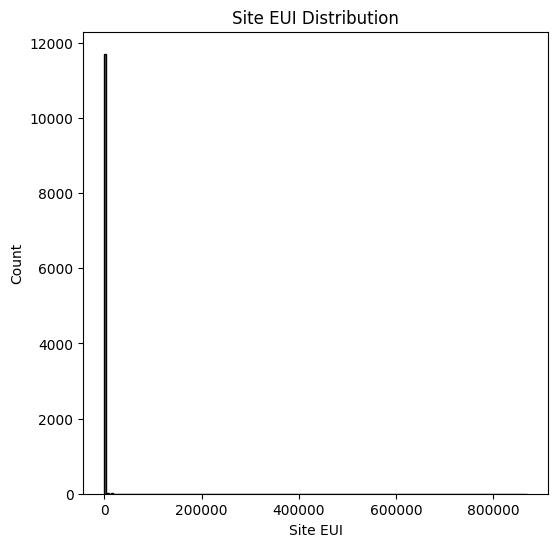

In [ ]:
figsize(6, 6)

plt.hist(data['Site EUI (kBtu/ft²)'], bins = 200, edgecolor = 'black')

plt.xlabel('Site EUI')
plt.ylabel('Count')
plt.title('Site EUI Distribution')

Что можно увидеть на этой гистограмме? Что вообще происходит на графике?

Здесь, на этом графике мы видим явные выбросы! Из-за этого бедную гистограмму так сильно сплющило...

Посмотрим на статистики этой же колонки, воспользовавшись методом `describe()`

In [ ]:
data['Site EUI (kBtu/ft²)'].describe()

,Site EUI (kBtu/ft²)
count,11746.000000
mean,280.071484
std,8547.243929
min,0.000000
25%,62.100000
50%,79.000000
75%,98.800000
max,869265.000000


Только посмотрите на то, какой разброс между третьим квартилем и максимумом...


Посмотрим на топ 10 самых больших значений в этой колонке:

In [ ]:
data['Site EUI (kBtu/ft²)'].dropna().sort_values().tail(10)

,Site EUI (kBtu/ft²)
3173,51328.8
3170,51831.2
3383,78360.1
8269,84969.6
3263,95560.2
8268,103562.7
8174,112173.6
3898,126307.4
7,143974.4
8068,869265.0


Давайте посмотрим на то, сколько вообще существует объектов со значением метрики больше 1000:

In [ ]:
data[data['Site EUI (kBtu/ft²)'] > 1000].shape[0]

47

Их всего 47!

Повнимательнее посмотрим на эти выбросы:

In [ ]:
data.loc[data['Site EUI (kBtu/ft²)'] > 1000, :]

,Order,Property Id,Property Name,Parent Property Id,Parent Property Name,BBL - 10 digits,"NYC Borough, Block and Lot (BBL) self-reported",NYC Building Identification Number (BIN),Address 1 (self-reported),Postal Code,Street Number,Street Name,Borough,DOF Gross Floor Area,Primary Property Type - Self Selected,List of All Property Use Types at Property,Largest Property Use Type,Largest Property Use Type - Gross Floor Area (ft²),Year Built,Number of Buildings - Self-reported,Occupancy,Metered Areas (Energy),Metered Areas (Water),score,Site EUI (kBtu/ft²),Weather Normalized Site EUI (kBtu/ft²),Weather Normalized Site Electricity Intensity (kWh/ft²),Weather Normalized Site Natural Gas Intensity (therms/ft²),Weather Normalized Source EUI (kBtu/ft²),Natural Gas Use (kBtu),Weather Normalized Site Natural Gas Use (therms),Electricity Use - Grid Purchase (kBtu),Weather Normalized Site Electricity (kWh),Total GHG Emissions (Metric Tons CO2e),Direct GHG Emissions (Metric Tons CO2e),Indirect GHG Emissions (Metric Tons CO2e),Property GFA - Self-Reported (ft²),Water Use (All Water Sources) (kgal),Water Intensity (All Water Sources) (gal/ft²),Source EUI (kBtu/ft²),Release Date,Water Required?,DOF Benchmarking Submission Status,Latitude,Longitude,Community Board,Council District,Census Tract,NTA
7,10,2610789,North Shore Towers,2610789,North Shore Towers,4084890001,4084890001,4456886;4456885;4453535;4456888,270-10 Grand Central Parkway,11005,269,GRAND CENTRAL PKWY,Queens,3750565.0,Multifamily Housing,"Financial Office, Medical Office, Multifamily ...",Multifamily Housing,2400000.0,1974,4,100,Whole Building,Combination of common and tenant areas,59.854594,143974.4,143976.000000,11.072643,1439.700000,151174.500000,3.942852e+11,3.942852e+09,5.965472e+06,1.768752e+06,20943400.0,20943400.0,0.0,2738875.0,107151.500000,39.130000,151172.9,04/28/2017 07:44:37 AM,Yes,In Compliance,40.757859,-73.715543,13.000000,23.000000,155101.000000,Glen Oaks-Floral Park-New Hyde Park ...
8,11,2611745,Towers Golf Course and Irrigation Wells,2610789,North Shore Towers,4084890001,4084890001,4456888,272-86 Grand Central Parkway,11005,269,GRAND CENTRAL PKWY,Queens,3750565.0,Other,Other,Other,200.0,1974,1,100,Whole Building,-1,59.854594,1138.3,1091.500000,319.900000,1.901441,3427.300000,5.048545e+07,5.364578e+05,2.276581e+05,6.397990e+04,21.1,0.0,21.1,200.0,19261.100000,96305.690000,3574.2,04/28/2017 07:44:37 AM,Yes,In Compliance,40.757859,-73.715543,13.000000,23.000000,155101.000000,Glen Oaks-Floral Park-New Hyde Park ...
62,65,2658585,CEPSR Schapiro,3612678,Columbia University (morningside),1019730001,1019730001,1084476,530 West 120th Street,10027,530,WEST 120 STREET,Manhattan,1368870.0,Office,Office,Office,204069.0,1988,1,100,Whole Building,-1,1.000000,4377.4,4377.400000,179.300000,37.700000,5874.800000,7.684530e+08,7.684530e+06,1.248366e+08,3.658750e+07,52401.0,40816.2,11584.8,204069.0,15917.984063,136.172432,5874.8,04/24/2017 06:52:20 PM,No,In Compliance,40.809752,-73.960217,9.000000,7.000000,203.000000,Morningside Heights ...
123,126,2826188,Warren Weaver Hall,3616399,New York University: Washington Square,1005350036,1005350036,1008627,251 Mercer Street,10012,17,WEST 3 STREET,Manhattan,119170.0,College/University,College/University,College/University,158590.0,1966,1,100,Whole Building,-1,59.854594,9915.6,9958.600000,44.000000,94.300000,10755.300000,1.495878e+09,1.495878e+07,2.381303e+07,6.979200e+06,85582.7,83372.9,2209.8,158590.0,27410.900000,172.840000,10711.8,04/28/2017 07:15:52 PM,Yes,In Compliance,40.728347,-73.995898,2.000000,1.000000,5501.000000,West Village ...
541,585,2714770,zzzWassner 86 Trinity Place/ 113 Greenwich,Not Applicable: Standalone Property,Not Applicable: Standalone Property,1000510013,1-00051-0013,1001033,86 Trinity Place,10006,86,TRINITY PLACE,Manhattan,181725.0,Office,Office,Office,167555.0,1921,1,100,Whole Building,Whole Building,1.000000,2025.2,309.747466,11.072643,1.901441,417.915709,5.048545e+07,5.364578e+05,9.881451e+05,1.768752e+06,2255

Есть ли какие-то закономерности в данных? Можно ли сделать какие-то выводы касательно этих зданий?

Воспользуемся boxplot-ом из библиотеки seaborn для того, чтобы убедиться, что эти объекты действительно похожи на выбросы

<Axes: ylabel='Site EUI (kBtu/ft²)'>

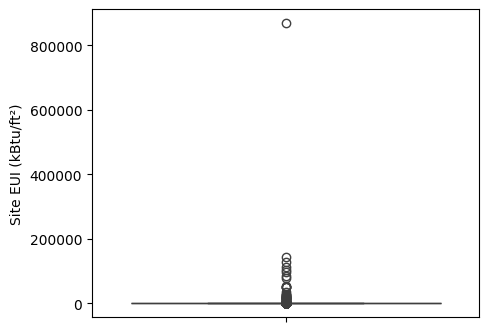

In [ ]:
plt.figure(figsize=(5, 4))

sns.boxplot(data=data['Site EUI (kBtu/ft²)'])

Что же опять пошло не так?...

---

### Reminder: BoxPlot

<img src=https://i.ytimg.com/vi/BE8CVGJuftI/maxresdefault.jpg width="700">

Box plot — график, использующийся в описательной статистике, компактно изображающий одномерное распределение вероятностей.

Такой вид диаграммы в удобной форме показывает медиану (или, если нужно, среднее), нижний и верхний квартили, минимальное и максимальное значение выборки и выбросы.

Несколько таких ящиков можно нарисовать бок о бок, чтобы визуально сравнивать одно распределение с другим; их можно располагать как горизонтально, так и вертикально. Расстояния между различными частями ящика позволяют определить степень разброса (дисперсии) и асимметрии данных и выявить выбросы.

---



### Работа с выбросами

Для того, чтобы качественно осуществлять Univariate analysis, нам, конечно же, нужно научиться избавляться от выбросов после их выявления.

Вообще, выбросы ([outliers](https://www.itl.nist.gov/div898/handbook/prc/section1/prc16.htm)) могут быть связаны с разными причинами: опечатки, ошибки в единицах измерения или даже корректные, но чересчур экстремальными значения.

Удалять выбросы можно разными способами, но один из самых популярных работает по следующей схеме:

- Ниже первой квартили - `3 iqr` (межквартильное расстояние)
- Выше третьей квартили + `3 iqr` (межквартильное расстояние)

При этом `3` не является какой-либо мировой константой и вполне может варьироваться от задачи к задаче.


In [ ]:
# Рассчитаем первый и третий квартили поля Site EUI или возьмем значения из вывода метода describe
first_quartile = data['Site EUI (kBtu/ft²)'].describe()['25%']
third_quartile = data['Site EUI (kBtu/ft²)'].describe()['75%']

# Рассчитаем IQR как разницу между третьим и первым квартилями
iqr = third_quartile - first_quartile

Создадим условие на столбец Site EUI для отбора НЕ выбросов, воспользовавшись выражением выше


In [ ]:
condition = (data['Site EUI (kBtu/ft²)'] > (first_quartile - 3 * iqr)) & (data['Site EUI (kBtu/ft²)'] < (third_quartile + 3 * iqr))
condition

,Site EUI (kBtu/ft²)
0,False
1,False
2,False
3,False
4,False
...,...
11741,True
11742,True
11743,True
11744,True


Применим созданное условие к нашим данным, отфильтровав тем самым строки, не являющиеся выбросами


In [ ]:
data = data[condition]

In [ ]:
# Посмотрим какого размера у нас стал датасет
data.shape

(11325, 49)

In [ ]:
# Посмотрим на сами данные, чтобы убедиться, что все в порядке
data.head()

,Order,Property Id,Property Name,Parent Property Id,Parent Property Name,BBL - 10 digits,"NYC Borough, Block and Lot (BBL) self-reported",NYC Building Identification Number (BIN),Address 1 (self-reported),Postal Code,Street Number,Street Name,Borough,DOF Gross Floor Area,Primary Property Type - Self Selected,List of All Property Use Types at Property,Largest Property Use Type,Largest Property Use Type - Gross Floor Area (ft²),Year Built,Number of Buildings - Self-reported,Occupancy,Metered Areas (Energy),Metered Areas (Water),score,Site EUI (kBtu/ft²),Weather Normalized Site EUI (kBtu/ft²),Weather Normalized Site Electricity Intensity (kWh/ft²),Weather Normalized Site Natural Gas Intensity (therms/ft²),Weather Normalized Source EUI (kBtu/ft²),Natural Gas Use (kBtu),Weather Normalized Site Natural Gas Use (therms),Electricity Use - Grid Purchase (kBtu),Weather Normalized Site Electricity (kWh),Total GHG Emissions (Metric Tons CO2e),Direct GHG Emissions (Metric Tons CO2e),Indirect GHG Emissions (Metric Tons CO2e),Property GFA - Self-Reported (ft²),Water Use (All Water Sources) (kgal),Water Intensity (All Water Sources) (gal/ft²),Source EUI (kBtu/ft²),Release Date,Water Required?,DOF Benchmarking Submission Status,Latitude,Longitude,Community Board,Council District,Census Tract,NTA
12,15,2637863,Cadman Towers,2637863,Cadman Towers,3002320001;3002380035,3002320001;3002380035,3001727;3319420,101 Clark St,11201,-1,-1,-1,173269.45442,Multifamily Housing,"Multifamily Housing, Other, Parking",Multifamily Housing,412503.0,1903,2,100,Whole Building,Whole Building,93.000000,32.0,309.747466,7.5,0.0,417.915709,2047200.0,20472.0,11241926.1,3249755.2,1194.0,150.8,1043.2,432503.0,22061.000000,51.010000,87.9,04/28/2017 04:07:55 PM,Yes,In Compliance,40.754379,-73.957057,7.140673,15.771275,4977.596647,-1
17,20,2777309,Barnard College,2777309,Barnard College,1019890001,1-01989-0001,1082351;1079204;1082351;1082347;1079205;1082350,3009 Broadway,10029,-1,-1,-1,173269.45442,College/University,"College/University, Residence Hall/Dormitory",College/University,323000.0,1907,7,100,Whole Building,-1,59.854594,120.0,125.200000,8.7,0.9,193.600000,52441239.4,556997.6,17958140.6,5217062.4,4554.7,2888.2,1666.5,598000.0,15917.984063,136.172432,188.7,05/01/2017 12:50:51 PM,Yes,In Compliance,40.754379,-73.957057,7.140673,15.771275,4977.596647,-1
18,21,2780056,720-730 Ft. Washington Owners Corp.,2780056,720-730 Ft. Washington Owners Corp.,1021800614;1021800628,1021800614;1021800628,1064475;1064476;1803806,720-730 Ft. Washington Ave.,10040,-1,-1,-1,173269.45442,Multifamily Housing,Multifamily Housing,Multifamily Housing,321464.0,1939,2,100,Whole Building,Whole Building,72.000000,76.2,79.900000,3.5,0.0,106.200000,880200.0,8906.3,3968641.7,1121931.8,1893.4,1525.1,368.3,321464.0,5915.600000,18.400000,103.3,05/01/2017 10:09:31 PM,Yes,In Compliance,40.754379,-73.957057,7.140673,15.771275,4977.596647,-1
19,22,4988574,- 720 Ft. Washington Ave. bldg,2780056,720-730 Ft. Washington Owners Corp.,1021800614,1021800614,1064475,720-730 Ft. Washington Ave.,10040,720,FT WASHINGTON AVENUE,Manhattan,179130.00000,Multifamily Housing,Multifamily Housing,Multifamily Housing,204720.0,1939,1,100,Whole Building,-1,67.000000,75.7,79.000000,4.0,0.0,109.100000,553439.4,5604.4,2886852.2,820016.2,1204.4,936.5,267.9,204720.0,15917.984063,136.172432,106.6,05/01/2017 10:09:31 PM,-1,In Compliance,40.857943,-73.934962,12.000000,10.000000,281.000000,Washington Heights North ...
20,23,4988569,- 730 Ft. Washington Ave bldg,2780056,720-730 Ft. Washington Owners Corp.,1021800628,1021800628,1064476;1803806,720-730 Ft. Washington Ave.,10040,730,FT WASHINGTON AVENUE,Manhattan,102150.00000,Multifamily Housing,Multifamily Housing,Multifamily Housing,116744.0,1939,1,100,Whole Building,-1,80.000000,77.1,82.700000,2.6,0.0,102.800000,326760.6,3301.9,1081789.4,308074.6,689.0,588.6,100.4,116744.0,15917.984063,136.172432,97.7,05/01/2017 10:09:31 PM,Yes,In Compliance,40.858256,-73.934734,12.000000,10.000000,281.00000

Вроде выглядит хорошо! Давайте построим теперь еще раз гистограмму распределения поля Site EUI, воспользовавшись функцией `plt.hist`, указав число бинов (например) 20. Проверим, насколько наши меры по удалению выбросов в действительности помогли!


Text(0.5, 1.0, 'Site EUI Distribution')

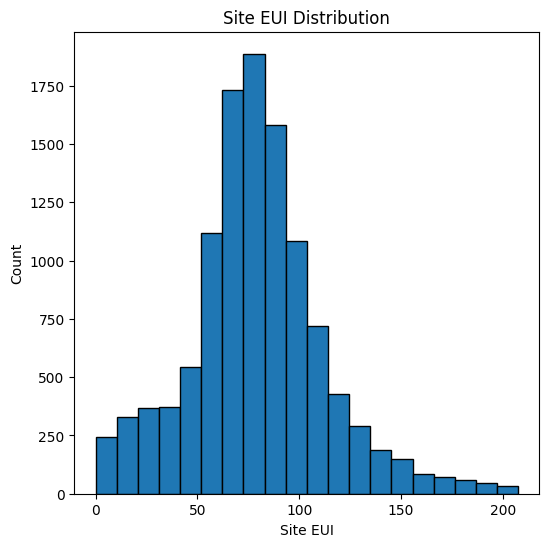

In [ ]:
figsize(6, 6)

plt.hist(data['Site EUI (kBtu/ft²)'], bins = 20, edgecolor = 'black')

plt.xlabel('Site EUI')
plt.ylabel('Count')
plt.title('Site EUI Distribution')

Потрясающе! Это даже очень напоминает нормальное распределение, что совсем здорово для наших данных!

Воспользуемся теперь еще раз boxplot-ом из библиотеки seaborn для того, чтобы убедиться, что выбросы пропали и что мы всё сделали правильно!

<Axes: >

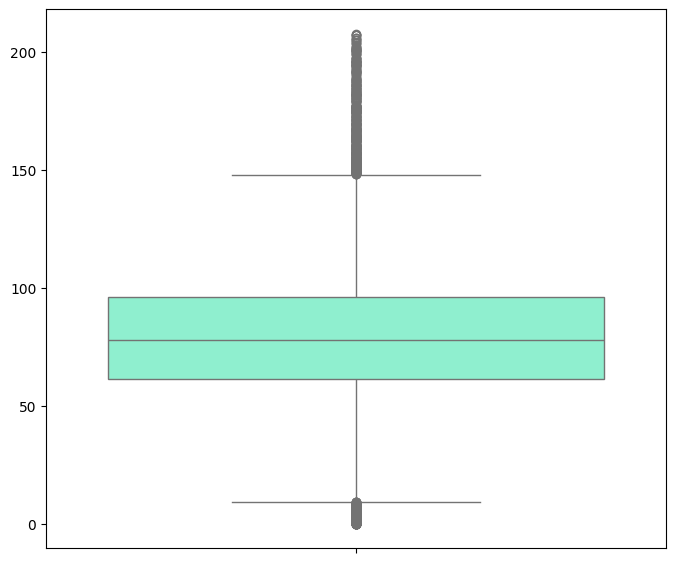

In [ ]:
plt.figure(figsize=(8, 7))

sns.boxplot(data=data['Site EUI (kBtu/ft²)'].values, color = 'aquamarine')

Действительно потрясающая работа! Мы молодцы! :)

#### Вопрос

Почему же, если работа такая хорошая, box-plot до сих пор детектирует какие-то выбросы на графике?

### Другие способы борьбы с выбросами

Помимо того способа, который мы использовали, есть следующие способы борьбы с выбросами:


- **Dropping the outlier rows with standard deviation**
```
factor = 3
upper_lim = data['column'].mean() + data['column'].std() * factor
lower_lim = data['column'].mean() - data['column'].std() * factor
data = data[(data['column'] < upper_lim) & (data['column'] > lower_lim)]
```

- **Dropping the outlier rows with Percentiles**
```
upper_lim = data['column'].quantile(.95)
lower_lim = data['column'].quantile(.05)
data = data[(data['column'] < upper_lim) & (data['column'] > lower_lim)]
```

**Примеры других способов:**

- Винсоризация — это серия трансформаций, направленных на ограничение влияния выбросов. 90%-ая винсоризация означает, что мы берём значения меньше 5% перцентиля и выше 95% перцентиля и приравниваем их к значениям на 5-м и 95-м перцентилях соответственно.
- Триминг — отличается от винсоризации тем, что мы не ограничиваем крайние значения каким-либо числом, а просто удаляем их.

Больше методов вы можете найти в [scipy.stats.mstats](https://docs.scipy.org/doc/scipy-0.14.0/reference/stats.mstats.html)

Ну а мы — возвращаемся назад к анализу :)


## Multivariate analysis

Значительную часть работы на этапе EDA занимает поиск взаимосвязей между различными признаками. Очевидно, что признаки и значения признаков, оказывающие основное влияние на целевой, интересуют нас сильнее, чем прочие — по ним лучше всего и предсказывать значение целевого.



### Влияние категориальной переменной на целевую

Одним из способов оценить влияние значений категориальных признаков (число значений такого признака подразумевается конечным) на целевой признак является построение графика density plot, например, используя модуль seaborn. Density plot можно представить себе как сглаженную гистограмму или же функцию плотности для некоторого распределения.

При применении этой визуализации в связке целевой переменной и нецелевой категориальной, мы получаем распределение целевого признака для одной конкретной категории.

Код ниже строит density plot для рейтинга энергопотребления в зависимости от типа здания. Разными цветами показаны рейтинги для различных типов (при этом к рассмотрению берутся только типы зданий с как минимум сотней записей в нашем наборе данных):

In [ ]:
# Создадим список types с названиями категорий зданий с более, чем 100 измерениями
types = data.dropna(subset=['score'])
types = types['Largest Property Use Type'].value_counts()
types = list(types[types.values > 100].index)
types.remove('Other')

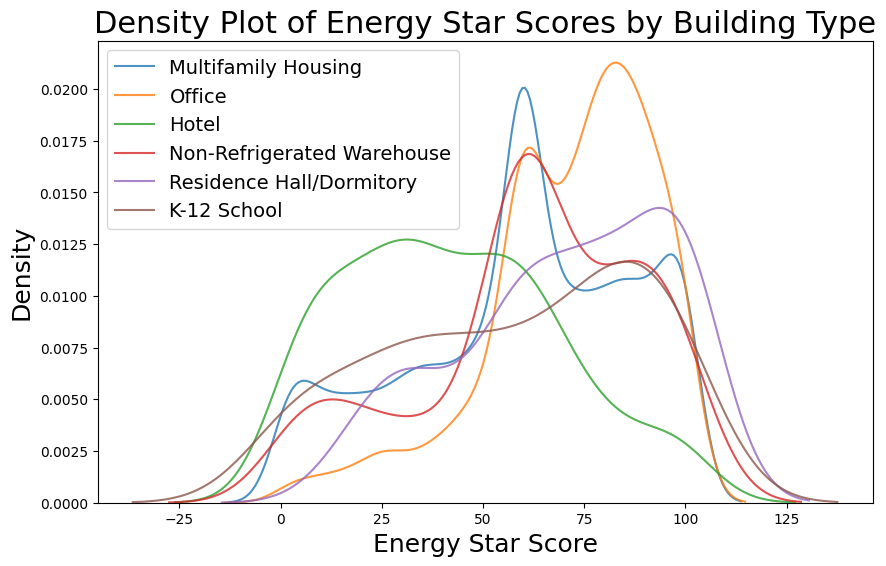

In [ ]:
figsize(10, 6)

# Постройте на одном графике распределения оценок для каждого типа зданий из списка types
for b_type in types:
    # Выберете данные одного из типов зданий из списка types
    subset = data[data['Largest Property Use Type'] == b_type]

    # Воспользуйтесь функцией kdeplot библиотеки seaborn для отрисовки распределения
    sns.kdeplot(subset['score'], label = b_type, fill = False, alpha = 0.8)

plt.xlabel('Energy Star Score', size = 18)
plt.ylabel('Density', size = 18)
plt.title('Density Plot of Energy Star Scores by Building Type', size = 22)
plt.legend(fontsize=14)

Какие результаты вы наблюдаете? Какие выводы можно сделать из графика?


Видно, что тип здания оказывает существенное влияние на рейтинг энергопотребления. Здания, используемые как офисы, чаще имеют хороший рейтинг, а отели наоборот. Получается, такой признак, как тип здания, для нас важен. Так как это признак категориальный, нам ещё предстоит выполнить с ним так называемый «one-hot encoding». Но это позже.



Давайте теперь повторим аналогичные действия для различных районов:

In [ ]:
# Создадим список boroughs с названиями районов с более, чем 100 измерениями
boroughs = data.dropna(subset=['score'])
boroughs = boroughs['Borough'].value_counts()
boroughs = list(boroughs[boroughs.values > 100].index)

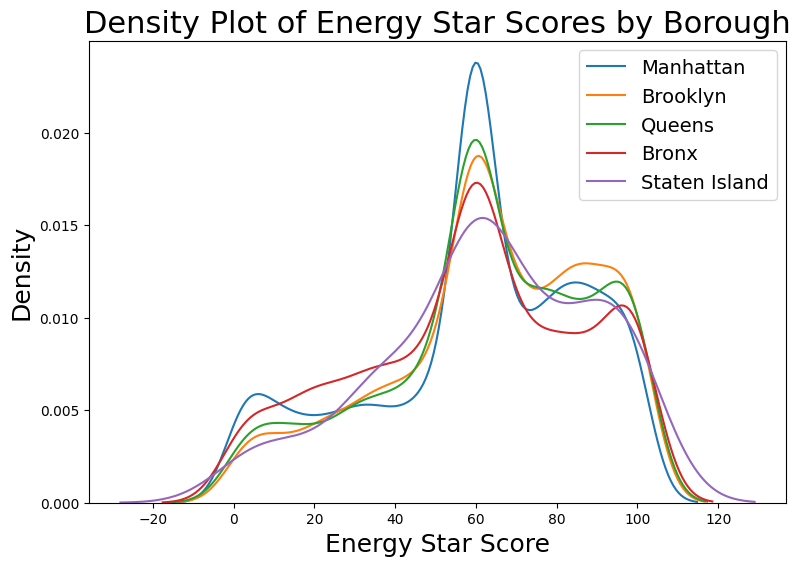

In [ ]:
figsize(9, 6)

# Постройте на одном графике распределения оценок для каждого района из списка boroughs
for borough in boroughs:
    # Выберете данные одного из районов из списка boroughs
    subset = data[data['Borough'] == borough]

    # Воспользуйтесь функцией kdeplot библиотеки seaborn для отрисовки распределения
    sns.kdeplot(subset['score'], label = borough)

plt.xlabel('Energy Star Score', size = 18)
plt.ylabel('Density', size = 18)
plt.title('Density Plot of Energy Star Scores by Borough', size = 22)
plt.legend(fontsize=14)

А какие выводы можно сделать здесь?

Похоже, что район оказывает уже не такое большое влияние. Тем не менее, пожалуй, стоит включить этот признак в модель, так как определенная разница между районами все же есть.

#### Вопрос

А теперь вопрос, так сказать, со звездочкой и одновременно с этим очень-очень важный. Не видите ли вы каких-то проблем с тем, как мы построили последние два графика?

#### Пояснение

Мы заполнили пропуски средним во ***всех*** числовых столбцах, ***в том числе*** в нашей целевой переменной. Из-за этого распределения ответов могли существенно поменяться... Нам с самого начала следовало строить распределение только по заполненным исходным строкам целевой переменной, даже если в других столбцах мы проделывали для таких строк заполнение средним!

Повторим быстренько пайплайн, скорректировав наши действия в необходимом месте.

In [ ]:
data = pd.read_csv('https://raw.githubusercontent.com/ddvika/DS_2021/main/lecture_2/Energy_consumption_NY.csv')

data = data.replace({'Not Available': np.nan})

for col in list(data.columns):
    if any([n_col in col for n_col in part_name_numeric_cols]):
        data[col] = data[col].astype(float)

data = data.drop(columns = list(missing_columns))

data = data[condition]

###
score_col = data['ENERGY STAR Score']
data.drop('ENERGY STAR Score', axis = 1, inplace = True)

data = data.fillna(data.mean(numeric_only = True))
data = data.fillna(-1)

data['score'] = score_col
###

Повторим построения двух последних графиков теперь! И сравним!

In [ ]:
types = data['Largest Property Use Type'].value_counts()
types = list(types[types.values > 100].index)
types.remove('Other')

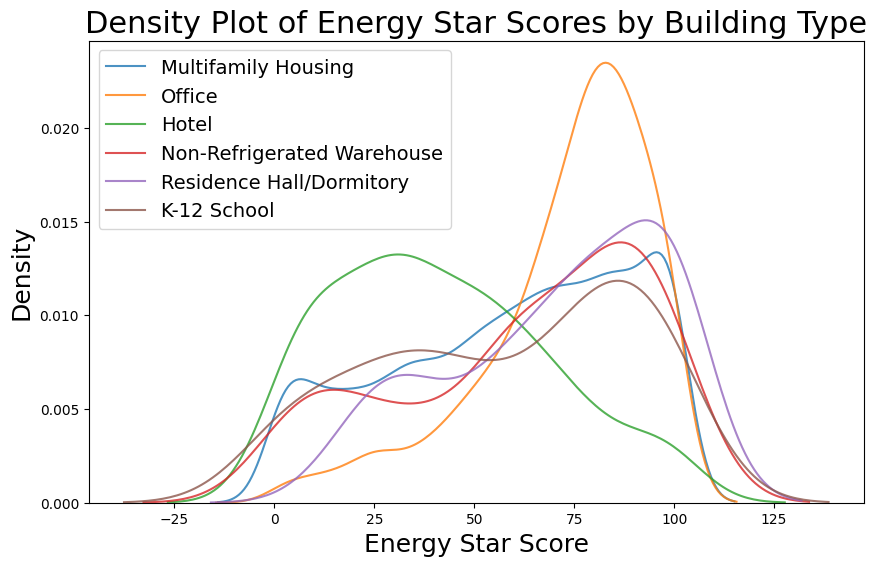

In [ ]:
figsize(10, 6)

# Постройте на одном графике распределения оценок для каждого типа зданий из списка types
for b_type in types:
    # Выберете данные одного из типов зданий из списка types
    subset = data[data['Largest Property Use Type'] == b_type]

    # Воспользуйтесь функцией kdeplot библиотеки seaborn для отрисовки распределения
    sns.kdeplot(subset['score'], label = b_type, fill = False, alpha = 0.8)

plt.xlabel('Energy Star Score', size = 18)
plt.ylabel('Density', size = 18)
plt.title('Density Plot of Energy Star Scores by Building Type', size = 22)
plt.legend(fontsize=14)

In [ ]:
boroughs = data['Borough'].value_counts()
boroughs = list(boroughs[boroughs.values > 100].index)

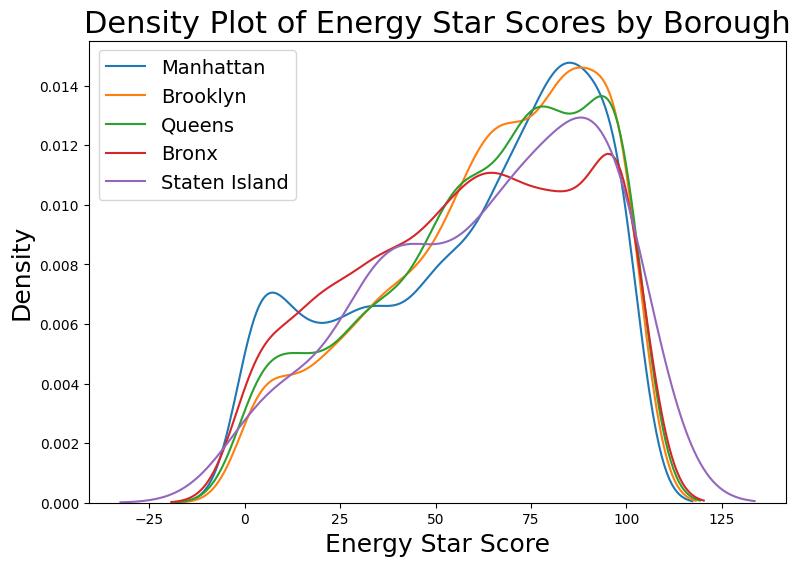

In [ ]:
figsize(9, 6)

# Постройте на одном графике распределения оценок для каждого района из списка boroughs
for borough in boroughs:
    # Выберете данные одного из районов из списка boroughs
    subset = data[data['Borough'] == borough]

    # Воспользуйтесь функцией kdeplot библиотеки seaborn для отрисовки распределения
    sns.kdeplot(subset['score'], label = borough)

plt.xlabel('Energy Star Score', size = 18)
plt.ylabel('Density', size = 18)
plt.title('Density Plot of Energy Star Scores by Borough', size = 22)
plt.legend(fontsize=14)

Ну что — разница как будто бы есть! :)

На таких графиках можно делать уже гораздо более значимые и осмысленные выводы!

### Корреляции между признаками и целевой переменной

Чтобы численно оценить степень влияния признаков, можно использовать [коэффициент корреляции Пирсона](http://www.statisticshowto.com/probability-and-statistics/correlation-coefficient-formula/).

Это мера степени и положительности линейных связей между двумя переменными.  Значение в +1 означает идеальную пропорциональность между значениями признаков и, соответственно, в -1 аналогично, но с отрицательным коэффициентом.

Несмотря на то, что это не дает нам никакого понятия о непропорциональных взаимосвязях, — это уже неплохое начало. В Pandas рассчитать величину корреляции довольно легко:

```
correlations_data = data.corr()['score'].sort_values()
```

In [ ]:
# Воспользуемся методом corr(), выберем столбец с целевой меткой 'score' и отсортируем значения корреляции
correlations_data = data.corr(numeric_only = True)['score'].sort_values()

# Выведем 15 признаков с наименьшей прямой корреляцией
print(correlations_data.head(15))

print('------------')

# Выведем 15 признаков с наибольшей прямой корреляцией
print(correlations_data.tail(15))

Site EUI (kBtu/ft²)                                          -0.722692
Weather Normalized Site EUI (kBtu/ft²)                       -0.675425
Source EUI (kBtu/ft²)                                        -0.638422
Weather Normalized Source EUI (kBtu/ft²)                     -0.608220
Weather Normalized Site Electricity Intensity (kWh/ft²)      -0.347377
Weather Normalized Site Natural Gas Intensity (therms/ft²)   -0.320799
Direct GHG Emissions (Metric Tons CO2e)                      -0.147420
Natural Gas Use (kBtu)                                       -0.126129
Weather Normalized Site Natural Gas Use (therms)             -0.124412
Year Built                                                   -0.121245
Total GHG Emissions (Metric Tons CO2e)                       -0.113375
Electricity Use - Grid Purchase (kBtu)                       -0.050926
Weather Normalized Site Electricity (kWh)                    -0.047364
Property Id                                                  -0.046616
Indire

Как можно видеть, в данных есть несколько признаков, имеющих высокие отрицательные значения коэффициента корреляции Пирсона.

Самая большая (по модулю) корреляция достигается для разных категорий EUI (они между собой слегка отличаются по способу расчета). EUI  —  Energy Use Intensity  —  это количество использованной энергии, разделенное на площадь помещений в квадратных футах. Значит, чем этот признак ниже, тем лучше. Соответственно: с ростом EUI, рейтинг энергопотребления, напротив, становится ниже.

Уже неплохие выводы для нас в рамках EDA!

Воспользуемся функцией heatmap библиотеки seaborn для отрисовки целой матрицы корреляции (тепловой карты)

<Axes: >

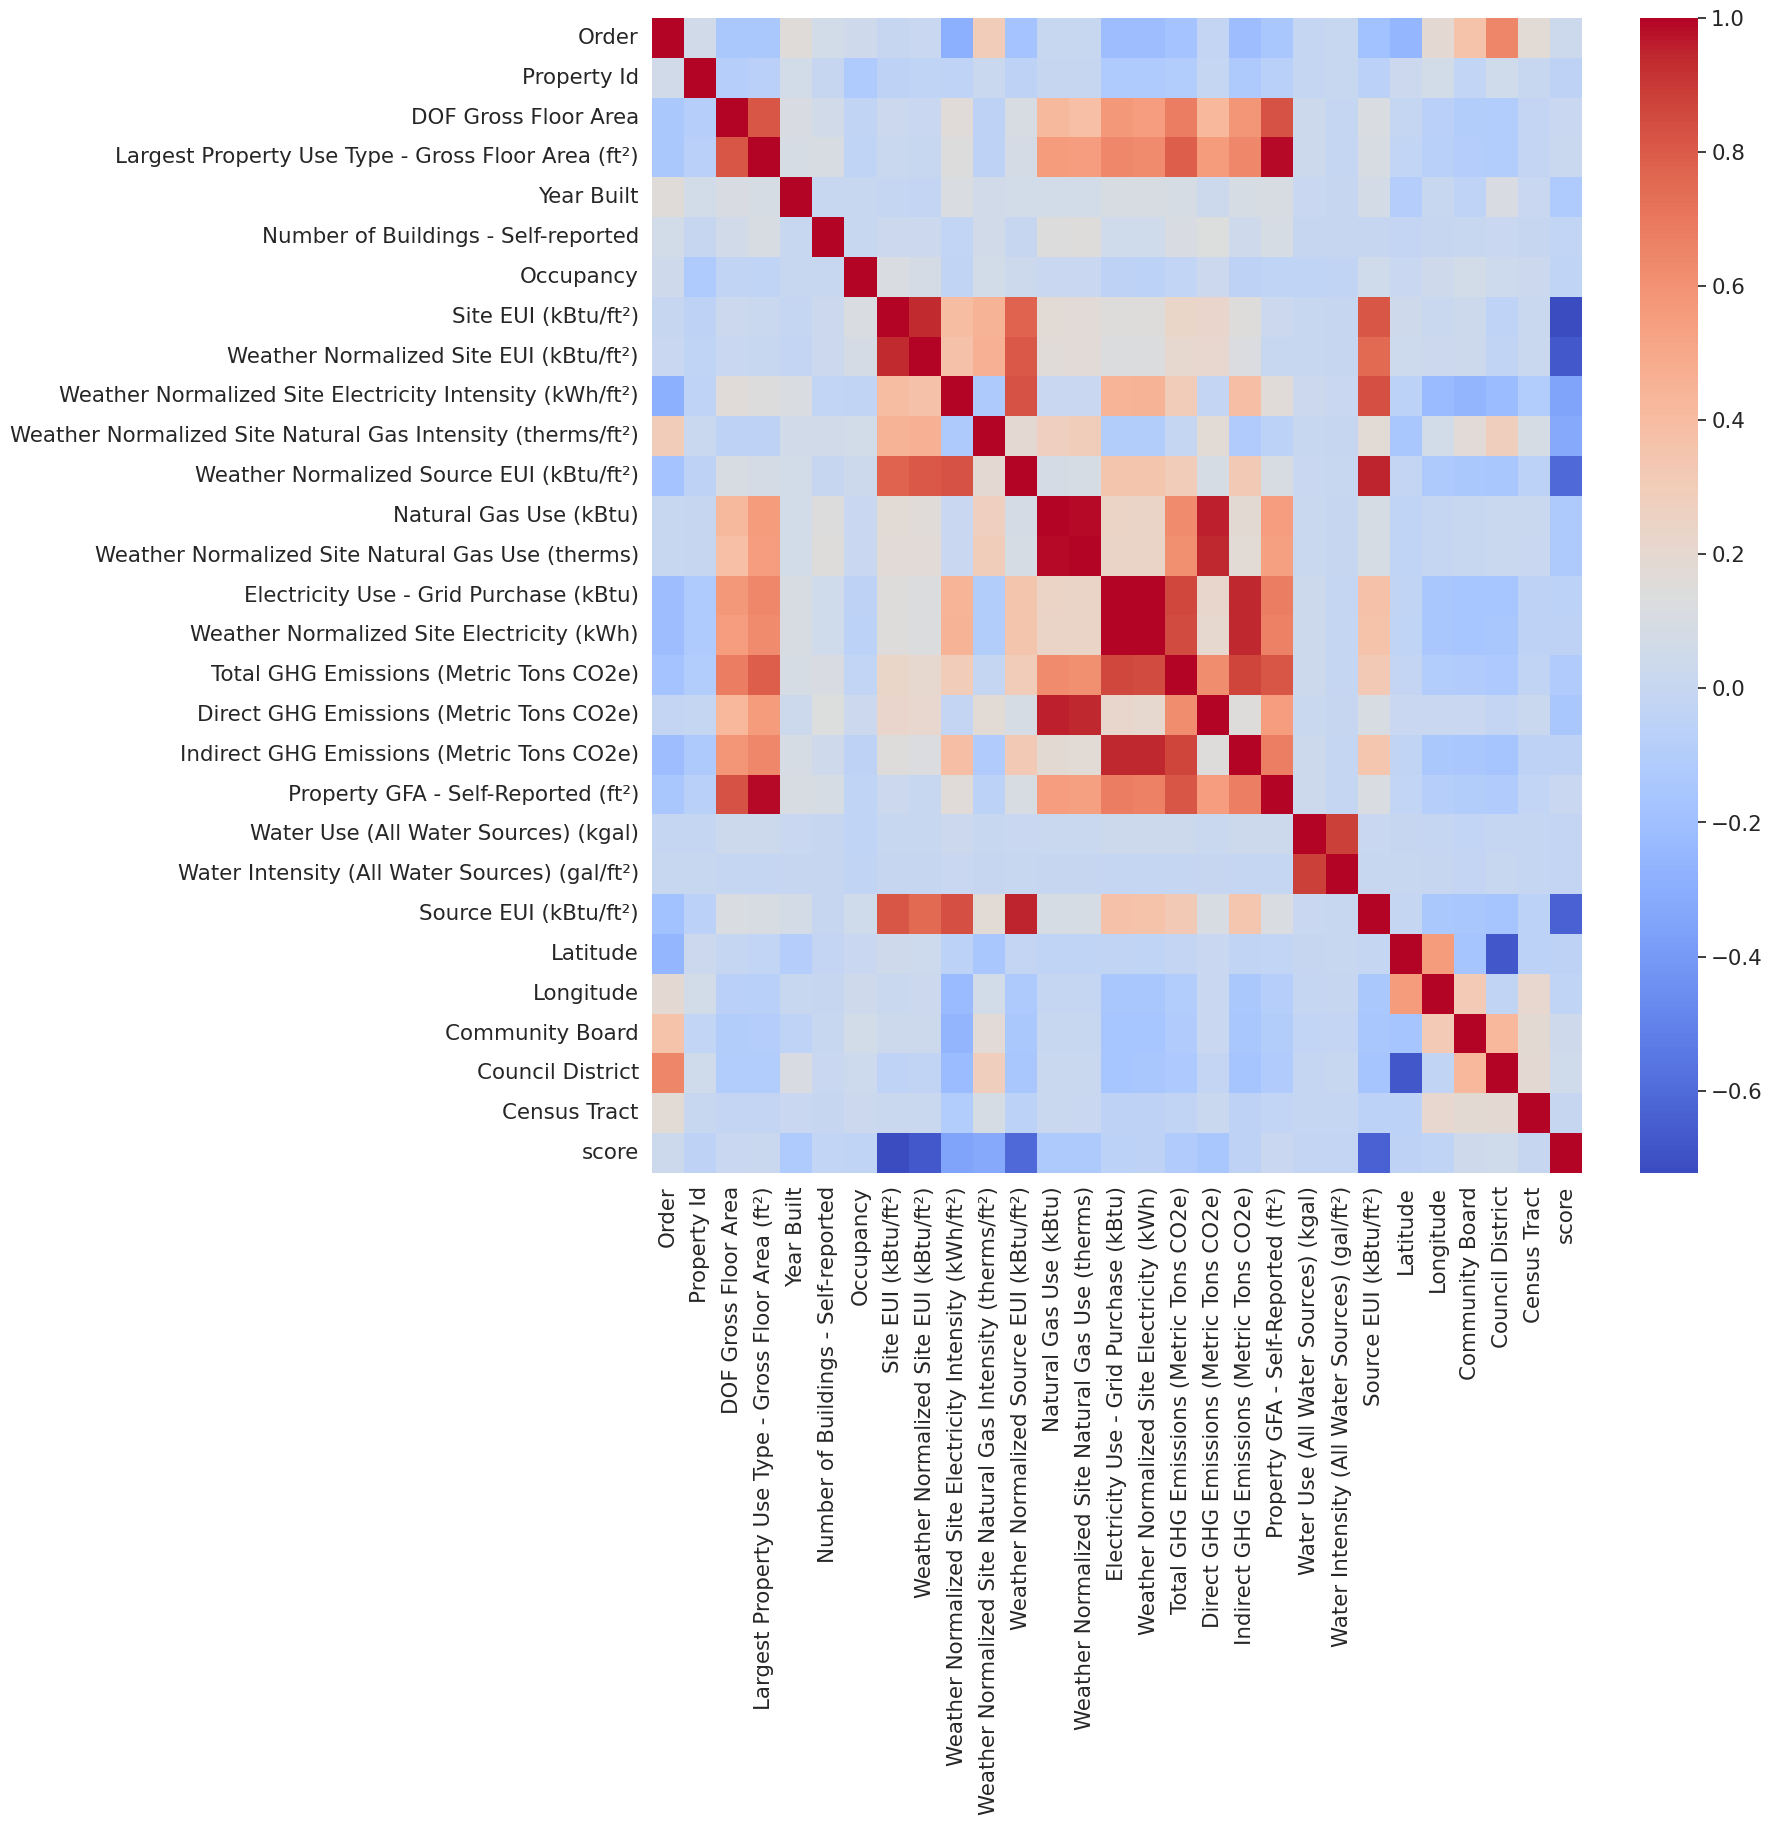

In [ ]:
sns.set(font_scale=1.4)
plt.figure(figsize=(15,15))

sns.heatmap(data.corr(numeric_only = True), cbar=True, cmap='coolwarm')

Какие выводы можно сделать, исходя из такой тепловой карты?

### Bivariate analysis

Для осуществления bivariate analysis, или иначе — анализа взаимосвязи двух непрерывных переменных, — можно использовать scatterplot (диаграмму рассеяния или точечные графики). Дополнительную информацию, такую как значения категориальных признаков, можно показывать различными цветами.

К примеру, график снизу демонстрирует нам разброс рейтинга энергопотребления в зависимости от величины Site EUI, а разными цветами показаны типы зданий (взятые из предыдущих пунктов):

In [ ]:
# Сделаем копию нашего датасета для того, чтобы ничего не испортить
features = data.copy()

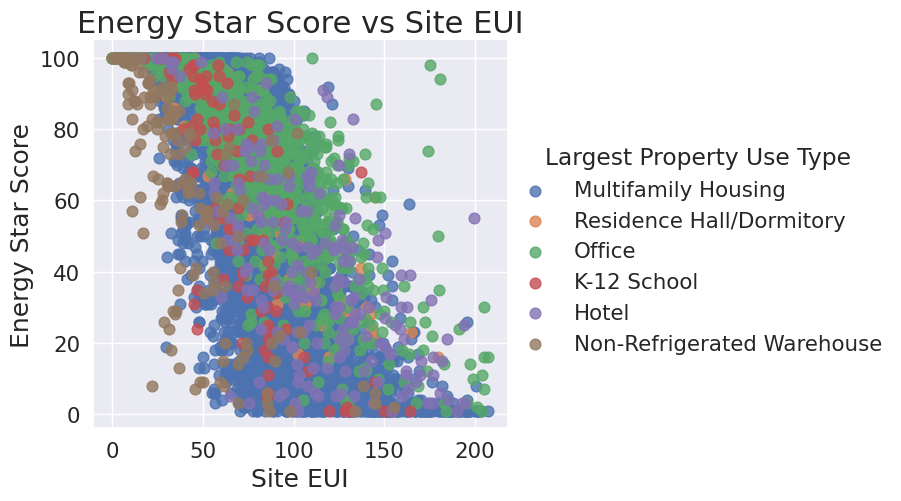

In [ ]:
figsize(8, 6)

# Выберем только те строки, которые соответствуют типам зданий, содержащим более 100 записей (.isin(types))
features = features[features['Largest Property Use Type'].isin(types)]

# Воспользуемся функцией lmplot библиотеки seaborn для построения графика scatterplot
# По осям которого будут столбцы score и Site EUI, а точки делятся на группы по типам зданий
sns.lmplot(x = 'Site EUI (kBtu/ft²)', y = 'score',
          hue = 'Largest Property Use Type', data = features,
          scatter_kws = {'alpha': 0.8, 's': 60}, fit_reg = False, aspect = 1.2)

plt.xlabel('Site EUI', size = 18)
plt.ylabel('Energy Star Score', size = 18)
plt.title('Energy Star Score vs Site EUI', size = 22);

Данный график наглядно демонстрирует, что такое коэффициент корреляции со значением -0.7: Site EUI уменьшается и рейтинг энергопотребления уверенно возрастает, независимо от типа здания.

### Pairs plot

Ну и, наконец, построим Pairs Plot. Pairs Plot — это мощный исследовательский инструмент, который позволяет взглянуть на взаимосвязи сразу между несколькими признаками, а также на их совместные парные распределения.

В примере ниже при построении использовался модуль seaborn и функция PairGrid. Построен Pairs Plot был со scatterplots выше главной диагонали, гистограммами на главной диагонали и 2D kernel density plots, с указанием корреляции, ниже главной диагонали.

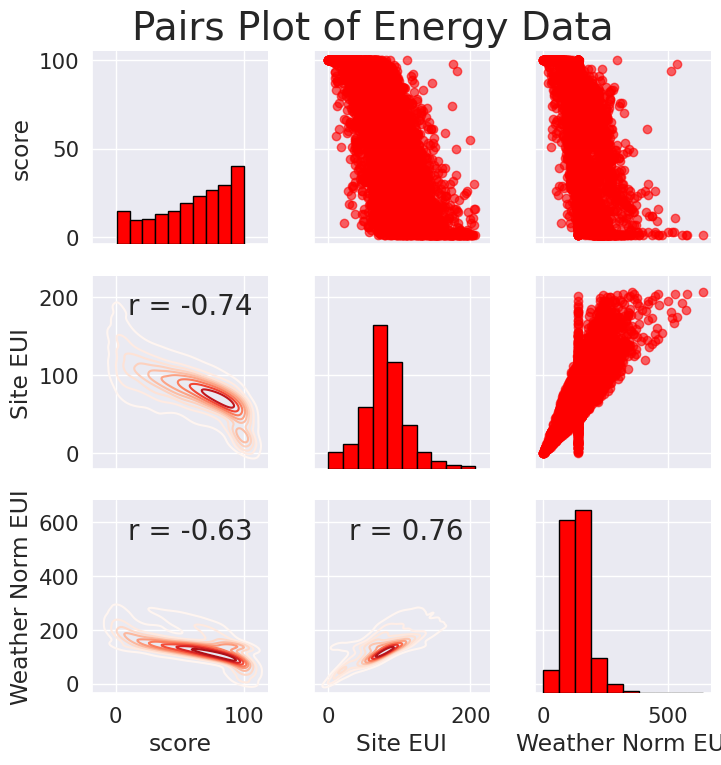

In [ ]:
# Выберем колонки, на которые мы будем смотреть в попарном разрезе
plot_data = features[['score', 'Site EUI (kBtu/ft²)',
                      'Weather Normalized Source EUI (kBtu/ft²)']]

# Заменим бесконечности на np.nan при помощи функции replace
plot_data = plot_data.replace({np.inf: np.nan, -np.inf: np.nan})

# Для удобства переименнуем колонки
plot_data = plot_data.rename(columns = {'Site EUI (kBtu/ft²)': 'Site EUI',
                                        'Weather Normalized Source EUI (kBtu/ft²)': 'Weather Norm EUI',
                                        'log_Total GHG Emissions (Metric Tons CO2e)': 'log GHG Emissions'})

# Удалим пропущенные значения
plot_data = plot_data.dropna()

# Воспользуемся следующей функцией для подсчета корреляции между двумя векторами
def corr_func(x, y, **kwargs):
    r = np.corrcoef(x, y)[0][1]
    ax = plt.gca()
    ax.annotate("r = {:.2f}".format(r),
                xy=(.2, .8), xycoords=ax.transAxes,
                size = 20)

# Создадим объект PairGrid и настроем в нем отображение графиков
grid = sns.PairGrid(data = plot_data)

# Если интересно за что отвечает каждый метод, то можно их потыкать и посмотреть как меняется результат:)
grid.map_upper(plt.scatter, color = 'red', alpha = 0.6)
grid.map_diag(plt.hist, color = 'red', edgecolor = 'black')
grid.map_lower(corr_func);
grid.map_lower(sns.kdeplot, cmap = plt.cm.Reds)

plt.suptitle('Pairs Plot of Energy Data', size = 28, y = 1.02);

Для того чтобы посмотреть на интересующие нас отношения между величинами, достаточно просто взять пересечение требуемых строки и столбца. Например, чтобы взглянуть на корреляцию между Weather Norm EUI и score, смотрим на строку Weather Norm EUI и столбец score соответственно. Также видно, что, например, коэффициент корреляции Пирсона между ними равняется -0.63.



Помимо того, что график довольно красиво выглядит, он ещё может помочь понять, какие признаки стоит включить в нашу модель.